### COVID-19 hospitalization prediction model

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

# df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-06,273374.0,1138,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,3322.0,7094.0,14534035,176771,5624444.0,56,204063869,1634532
1,1,2020-12-05,272236.0,2445,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,3321.0,7005.0,14357264,211073,5576026.0,56,202429337,2169756
2,2,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
3,3,2020-12-03,267228.0,2706,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,3280.0,6867.0,13921360,210204,5404018.0,56,198404712,1828230
4,4,2020-12-02,264522.0,2733,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,3252.0,6855.0,13711156,195796,5322128.0,56,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
316,316,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
317,317,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (320, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
1,2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
4,2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
316,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
317,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Drop the null rows
df_Covid_data = df_Covid_data.dropna()
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
1,2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
4,2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
252,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
253,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
254,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115


In [11]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456


In [12]:
# Specified data columns to be used in the model 
X = df_Covid_data[['inIcuCurrently','hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease',\
             'recovered']]
y = df_Covid_data['onVentilatorCurrently'].values.reshape(-1,1)
y

array([[7094.],
       [7005.],
       [6999.],
       [6867.],
       [6855.],
       [6649.],
       [6520.],
       [6245.],
       [6148.],
       [6030.],
       [5986.],
       [5990.],
       [5630.],
       [5458.],
       [5233.],
       [5103.],
       [5055.],
       [4859.],
       [4701.],
       [4379.],
       [4166.],
       [3939.],
       [3945.],
       [3769.],
       [3622.],
       [3367.],
       [3201.],
       [3110.],
       [2977.],
       [2947.],
       [2850.],
       [2877.],
       [2832.],
       [2733.],
       [2637.],
       [2553.],
       [2502.],
       [2477.],
       [2403.],
       [2347.],
       [2287.],
       [2301.],
       [2176.],
       [2230.],
       [2180.],
       [2147.],
       [2090.],
       [2045.],
       [1800.],
       [1762.],
       [1791.],
       [1739.],
       [1769.],
       [1776.],
       [1755.],
       [1666.],
       [1646.],
       [1667.],
       [1655.],
       [1638.],
       [1646.],
       [1609.],
       [

In [13]:

print(X.shape, y.shape)

(256, 6) (256, 1)


## Model - LinearRegression

In [14]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [47]:
X_train

array([[8.547000e+03, 1.563000e+03, 3.829700e+04, 1.700135e+06,
        1.941100e+04, 3.912230e+05],
       [9.487000e+03, 2.651000e+03, 4.732200e+04, 5.205014e+06,
        5.162100e+04, 1.773505e+06],
       [6.452000e+03, 2.480000e+03, 5.789400e+04, 3.619170e+06,
        7.621800e+04, 1.106096e+06],
       ...,
       [8.291000e+03, 2.131000e+03, 4.039700e+04, 8.255450e+06,
        6.095800e+04, 3.321258e+06],
       [7.956000e+03, 1.425000e+03, 3.573500e+04, 1.769819e+06,
        2.343700e+04, 4.943080e+05],
       [6.785000e+03, 1.727000e+03, 3.498900e+04, 7.588542e+06,
        5.680200e+04, 3.037145e+06]])

In [15]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [16]:
# model.fit(X_train, y_train)

In [17]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [18]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [19]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
X_train = X_scaler.inverse_transform(X_train_scaled)
X_train

array([[8.547000e+03, 1.563000e+03, 3.829700e+04, 1.700135e+06,
        1.941100e+04, 3.912230e+05],
       [9.487000e+03, 2.651000e+03, 4.732200e+04, 5.205014e+06,
        5.162100e+04, 1.773505e+06],
       [6.452000e+03, 2.480000e+03, 5.789400e+04, 3.619170e+06,
        7.621800e+04, 1.106096e+06],
       ...,
       [8.291000e+03, 2.131000e+03, 4.039700e+04, 8.255450e+06,
        6.095800e+04, 3.321258e+06],
       [7.956000e+03, 1.425000e+03, 3.573500e+04, 1.769819e+06,
        2.343700e+04, 4.943080e+05],
       [6.785000e+03, 1.727000e+03, 3.498900e+04, 7.588542e+06,
        5.680200e+04, 3.037145e+06]])

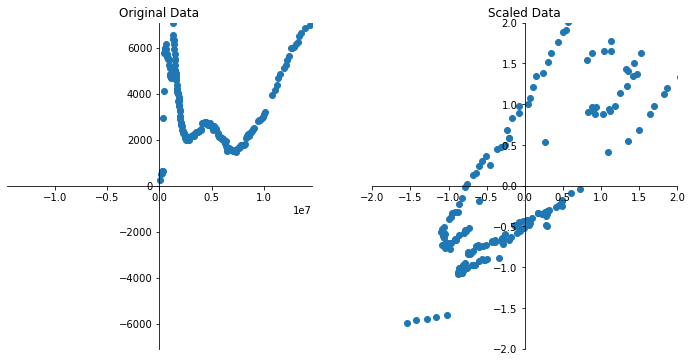

In [21]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

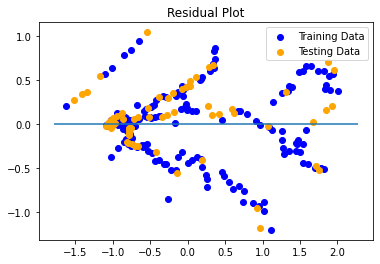

In [22]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [23]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.8356830762339946
Testing scaled Data Score: 0.8639786278505226
Weight coefficients: [[ 1.12096238 -0.0591718  -0.15154724 -0.00630754  0.03438175 -0.388998  ]]
y-axis intercept: [2.11247348e-17]


## Quantify the model using scaled data

In [24]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.14028239940481896, R2: 0.8639786278505226


In [68]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[7094.]
Predicted output:[6256.2]
Prediction Error:[-837.8]


In [100]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[6256.2,
 6178.91,
 6130.3,
 6048.28,
 6064.47,
 5905.35,
 5787.51,
 5715.49,
 5641.35,
 5654.25,
 5631.38,
 5479.01,
 5334.11,
 5335.88,
 5118.83,
 5040.15,
 5014.54,
 4836.2,
 4756.96,
 4571.07,
 4417.39,
 4224.74,
 4023.83,
 3955.7,
 3795.38,
 3707.13,
 3446.43,
 3360.0,
 3239.79,
 3245.53,
 3231.54,
 3201.16,
 3115.88,
 2957.92,
 2798.31,
 2686.74,
 2649.34,
 2634.67,
 2534.78,
 2454.77,
 2414.23,
 2430.69,
 2327.26,
 2361.52,
 1569.13,
 2108.25,
 2188.64,
 2169.49,
 2154.49,
 1887.13,
 1896.79,
 1837.25,
 1820.96,
 1771.35,
 1741.41,
 1684.56,
 1662.61,
 1658.34,
 1667.23,
 1616.47,
 1573.43,
 1697.0,
 1506.4,
 1463.73,
 1472.3,
 1512.68,
 1531.3,
 1528.68,
 1508.73,
 1486.71,
 1586.26,
 1566.08,
 1614.18,
 1617.84,
 1599.77,
 1622.87,
 1626.73,
 1644.17,
 1660.56,
 1652.58,
 1693.72,
 1708.86,
 1715.83,
 1716.38,
 1748.39,
 1828.54,
 1776.38,
 1833.65,
 1865.54,
 1866.11,
 1955.33,
 1996.4,
 2000.14,
 2083.79,
 2059.69,
 2122.6,
 2140.89,
 2163.03,
 2294.87,
 2336.69,
 2390.9,
 2

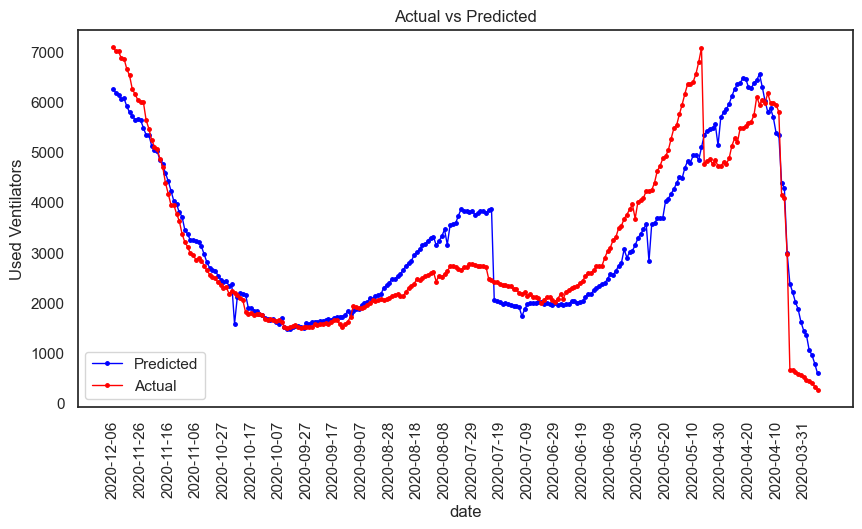

In [114]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()